#### Cleavelenad data set


Attributes description: 
     
- age: age in years
- sex: sex (1 = male; 0 = female) 
- cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl 
- fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false) 
- restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
- thalach: maximum heart rate achieved 
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak = ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- num: diagnosis of heart disease (angiographic disease status)
  The "num" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

        
    

2: Type.			Classification	

3: Origin.			Real world

4: Instances.		462

5: Features.		13

6: Classes.			4	

7: Missing values.	No

In [1]:
import warnings
warnings.filterwarnings('ignore')



In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, date # helpful library for handling date information.
import random

import matplotlib.pyplot as plt 
plt.close('all')
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import xgboost as xgb

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

random.seed(123)

/Users/kamakshibansal/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [75]:
# Adjust pandas display and formatting settings

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format        

# Increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# # Update default style
sns.set_style(style='darkgrid')

In [4]:
#Now, our data is loaded. We're writing the following snippet to see the loaded data. The purpose here is to see the top five of the loaded data.


df = pd.read_csv('processed.cleveland.data',sep = ',', names = ['Age', 'Sex', 'Cp', 'Trestbps',
                                                                'Chol', 'Fbs', 'Restecg', 'thalach', 'Exang', 'Oldpeak', 'Slope', 'CA','Thal', 'num'])
df.head()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,thalach,Exang,Oldpeak,Slope,CA,Thal,num
0,63.00,1.00,1.00,145.00,233.00,1.00,2.00,150.00,0.00,2.30,3.00,0.0,6.0,0
1,67.00,1.00,4.00,160.00,286.00,0.00,2.00,108.00,1.00,1.50,2.00,3.0,3.0,2
2,67.00,1.00,4.00,120.00,229.00,0.00,2.00,129.00,1.00,2.60,2.00,2.0,7.0,1
3,37.00,1.00,3.00,130.00,250.00,0.00,0.00,187.00,0.00,3.50,3.00,0.0,3.0,0
4,41.00,0.00,2.00,130.00,204.00,0.00,2.00,172.00,0.00,1.40,1.00,0.0,3.0,0


As mentioned in the Attributes description: Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0). Let's coming 1,2,3,4 by 1 (presence of disease) in a new column as Target

In [5]:
# As mentioned in the Attributes description: Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0). 
# Let's combine 1,2,3,4 by 1 (presence of disease) in a new column as Target

df['num'] = df['num'].replace([1,2,3,4], 1)

df['num'].value_counts()
# #Rename the num column to target 
df=df.rename( columns = {'num':'Heart_disease'})
df.head()

0    164
1    139
Name: num, dtype: int64

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,thalach,Exang,Oldpeak,Slope,CA,Thal,Heart_disease
0,63.00,1.00,1.00,145.00,233.00,1.00,2.00,150.00,0.00,2.30,3.00,0.0,6.0,0
1,67.00,1.00,4.00,160.00,286.00,0.00,2.00,108.00,1.00,1.50,2.00,3.0,3.0,1
2,67.00,1.00,4.00,120.00,229.00,0.00,2.00,129.00,1.00,2.60,2.00,2.0,7.0,1
3,37.00,1.00,3.00,130.00,250.00,0.00,0.00,187.00,0.00,3.50,3.00,0.0,3.0,0
4,41.00,0.00,2.00,130.00,204.00,0.00,2.00,172.00,0.00,1.40,1.00,0.0,3.0,0


In [6]:
df.CA.value_counts()

df[df["CA"]=='?'] #Printing those rows where there are non-numeric values.

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: CA, dtype: int64

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,thalach,Exang,Oldpeak,Slope,CA,Thal,Heart_disease
166,52.00,1.00,3.00,138.00,223.00,0.00,0.00,169.00,0.00,0.00,1.00,?,3.0,0
192,43.00,1.00,4.00,132.00,247.00,1.00,2.00,143.00,1.00,0.10,2.00,?,7.0,1
287,58.00,1.00,2.00,125.00,220.00,0.00,0.00,144.00,0.00,0.40,2.00,?,7.0,0
302,38.00,1.00,3.00,138.00,175.00,0.00,0.00,173.00,0.00,0.00,1.00,?,3.0,0


In [7]:
# Since, we just have 303 rows in our dataset, removing 4 rows which will be 1.32% of the data, will not be a good idea. Let's replace these non-numberic values by mode of CA.
df.CA.mode()
df["CA"]= df["CA"].replace("?", "0.0")
df.CA.value_counts()

0    0.0
dtype: object

0.0    180
1.0     65
2.0     38
3.0     20
Name: CA, dtype: int64

In [9]:
#Similarly, let's replace the non-numberic values by mode of Thal column.

df["Thal"].value_counts()
df["Thal"]= df["Thal"].replace("?", "3.0")
df["Thal"].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: Thal, dtype: int64

3.0    168
7.0    117
6.0     18
Name: Thal, dtype: int64

In [10]:
df.skew()

Age             -0.21
Sex             -0.77
Cp              -0.84
Trestbps         0.71
Chol             1.14
Fbs              1.99
Restecg          0.02
thalach         -0.54
Exang            0.74
Oldpeak          1.27
Slope            0.51
CA               1.21
Thal             0.26
Heart_disease    0.17
dtype: float64

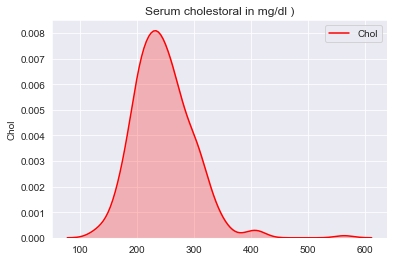

In [16]:
sns.kdeplot(df['Chol'], shade=True, color="r")
plt.ylabel('Chol')
plt.title('Serum cholestoral in mg/dl )');

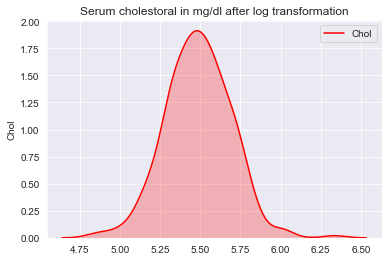

In [17]:
sns.kdeplot(np.log(df['Chol']), shade=True, color="r")
plt.ylabel('Chol')
plt.title('Serum cholestoral in mg/dl after log transformation');

In [18]:
df['Chol']= np.log(df['Chol'])
# df['Oldpeak']=np.log(df['Oldpeak'])

In [23]:
df.loc[((df['Cp'] == 1) | (df['Cp'] == 2)), 'Cp'] = 2 #combining the low volume categories to one category. Please refer EDA.

In [24]:
df["Cp"].value_counts(normalize=True) # Now 2 refers to having angina chest pain combining both typical and atypical categories

4.00   0.48
3.00   0.28
2.00   0.24
Name: Cp, dtype: float64

In [25]:
# df.loc[((df['Restecg'] == 1) | (df['Restecg'] == 2)), 'Restecg'] = 1

In [26]:
df['Restecg'].value_counts() # 1: abnormal   # 0: normal

0.00    151
2.00    148
1.00      4
Name: Restecg, dtype: int64

In [27]:
df.Heart_disease.value_counts()

0    164
1    139
Name: Heart_disease, dtype: int64

In [28]:
df

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,thalach,Exang,Oldpeak,Slope,CA,Thal,Heart_disease
0,63.00,1.00,2.00,145.00,5.45,1.00,2.00,150.00,0.00,2.30,3.00,0.0,6.0,0
1,67.00,1.00,4.00,160.00,5.66,0.00,2.00,108.00,1.00,1.50,2.00,3.0,3.0,1
2,67.00,1.00,4.00,120.00,5.43,0.00,2.00,129.00,1.00,2.60,2.00,2.0,7.0,1
3,37.00,1.00,3.00,130.00,5.52,0.00,0.00,187.00,0.00,3.50,3.00,0.0,3.0,0
4,41.00,0.00,2.00,130.00,5.32,0.00,2.00,172.00,0.00,1.40,1.00,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.00,1.00,2.00,110.00,5.58,0.00,0.00,132.00,0.00,1.20,2.00,0.0,7.0,1
299,68.00,1.00,4.00,144.00,5.26,1.00,0.00,141.00,0.00,3.40,2.00,2.0,7.0,1
300,57.00,1.00,4.00,130.00,4.88,0.00,0.00,115.00,1.00,1.20,2.00,1.0,7.0,1
301,57.00,0.00,2.00,130.00,5.46,0.00,2.00,174.00,0.00,0.00,2.00,1.0,3.0,1


In [29]:
# Data types are changed, as XGBoost doesn't takes categorical or bool as input.
df["CA"]=df["CA"].astype('float64')
df["Thal"]=df["Thal"].astype('float64')


In [30]:
# dff = pd.get_dummies(df, drop_first= True)
# dff

# Creating the Training and Test Sets


### With the data prepared, I am creating a training dataset and a test dataset. I’ll use the training dataset to build and validate the model, and treat the test dataset as the unseen new data I’d see if the model were in production.

In [31]:
msk = np.random.rand(len(df)) <= 0.9
train = df[msk]
test = df[~msk]

In [50]:
train.head(2)

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,thalach,Exang,Oldpeak,Slope,CA,Thal,Heart_disease
0,63.00,1.00,2.00,145.00,5.45,1.00,2.00,150.00,0.00,2.30,3.00,0.00,6.00,0
1,67.00,1.00,4.00,160.00,5.66,0.00,2.00,108.00,1.00,1.50,2.00,3.00,3.00,1


In [33]:
##Split into training and test set
## Define X and Y variables
X = train.drop('Heart_disease', axis=1)
Y = train[['Heart_disease']]


from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X,Y, test_size = .1, random_state=12)

If the oversampling using SMOTE algorithm was done before splitting into training and validation datasets, the information would “bleed” from the validation set into the training of the model.

Let's understand this with a help of a example, were we are just duplicating rows. If we upsample the dataset before splitting the data, the same data point might end up in both the training and validation dataset. As a result the accuracy will be very high.

Though, using SMOTE algorithm, we are not creating duplicate observations. However, since the SMOTE algorithm uses the nearest neighbors of observations to create synthetic data which still bleeds some information as the information about centroid of dataset will be there in these newly created synthetic data points which will be present in both the training and validation set if oversampling is done before spllitting. 

Hence, the oversampling is done after splitting the dataset into training and validation set.



In [34]:
 y_train["Heart_disease"].value_counts()

0    135
1    107
Name: Heart_disease, dtype: int64

In [71]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()
    
def Results(model, ypredict,X,Y, i):
    
    print("Training accuracy",round((model.score(X,Y)*100),3))
    print()
    print("Testing accuracy",round((model.score( x_val, y_val)*100),3))
    print()
    print("Confusion Matrix {}".format(i))
    (draw_cm(y_val,ypredict))
    print()
    print("Recall:",round((recall_score(y_val,ypredict)*100),3))
    print()
    print("Precision:",round((precision_score(y_val,ypredict)*100),3))
    print()
    print("F1 Score:",round((f1_score(y_val,ypredict)*100),3))
    print()
    print("Roc Auc Score:",round((roc_auc_score(y_val,ypredict)*100),3))
    ROC_curve (model, ypredict, i)


def ROC_curve (model, ypredict, i ):
    model_roc_auc = roc_auc_score(y_val, ypredict)
    fpr, tpr, thresholds = roc_curve(y_val, model.predict_proba(x_val)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label="{}(area = %0.2f)".format(i) % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for {}'.format(i))
    plt.legend(loc="lower right")
    plt.savefig('{}_ROC'.format(i))
    plt.show()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Training accuracy 85.537

Testing accuracy 85.185

Confusion Matrix Logistic Regression before sampling


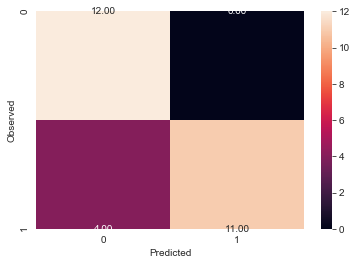


Recall: 73.333

Precision: 100.0

F1 Score: 84.615

Roc Auc Score: 86.667


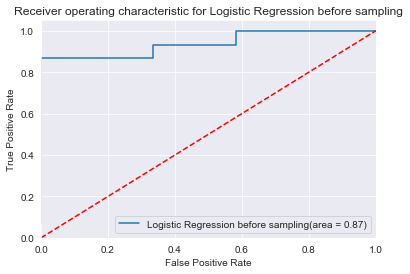

In [72]:
#Without sampling


from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42 )
logreg.fit(x_train, y_train)
ypred1= logreg.predict(x_val)

Results(logreg, ypred1, x_train, y_train,"Logistic Regression before sampling")  

In [38]:
# train_score=[]
# test_score=[]
# recall=[]
# solver = ['newton-cg','lbfgs','liblinear','sag','saga']
# for i in solver:
#     model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i);  # changing values of solver
#     model.fit(x_train, y_train) 
#     y_predict = model.predict(x_val)     
#     train_score.append(round(model.score(x_train, y_train),3))
#     test_score.append(round(model.score(x_val, y_val),3))
# #     recall.append((recall_score(y_val, y_predict))
    
# print(solver)
# print()
# print(train_score)
# print()
# print(test_score)

# # print(recall)

# SMOTE Technique for upsampling

In [39]:
sm1 = SMOTE(random_state=12,ratio = 1.0)
x_train_res, y_train_res = sm1.fit_sample(x_train, y_train)

/Users/kamakshibansal/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [40]:
#After Sampling


logregsmote = LogisticRegression(random_state=42, solver="liblinear" )
logregsmote.fit(x_train_res, y_train_res)

ypred= logregsmote.predict(x_val)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Training accuracy 85.185

Testing accuracy 88.889

Confusion Matrix Logistic Regression after sampling


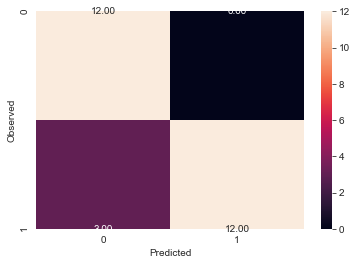


Recall: 80.0

Precision: 100.0

F1 Score: 88.889

Roc Auc Score: 90.0


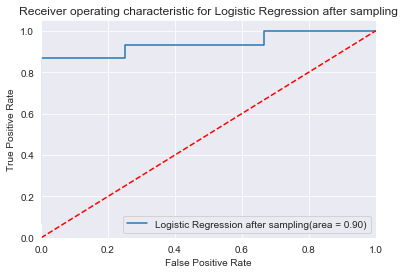

In [73]:
Results(logregsmote, ypred, x_train_res, y_train_res,"Logistic Regression after sampling")  

# Performance of Logistic Regression on completely unseen data like it will be in Production


 
Final Testing Score: 0.8823529411764706
Recall Score: 0.8235294117647058

Confusion matrix of the completely unseen test data


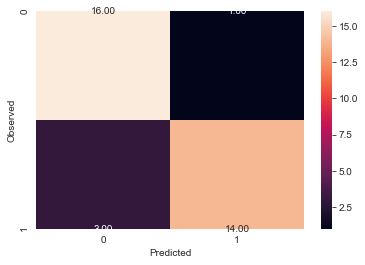

In [59]:
# Performance on completely unseen data
Xtest= test.drop('Heart_disease', axis=1)
Ytest = test[['Heart_disease']]

ypredf= logreg.predict(Xtest)


print("\n \nFinal Testing Score:", logreg.score(Xtest, Ytest))
print("Recall Score:",recall_score( Ytest,ypredf ))
print ("\nConfusion matrix of the completely unseen test data")
cm = confusion_matrix( Ytest, ypredf)
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
plt.ylabel('Observed')
plt.xlabel('Predicted')
plt.show();


- These are the results from Logistic regression before upsampling. The Training score and testing score are quite similar, they are 85.53% and 85.13% respectively. Recall is although 73.3% which increased to 80% approx after sampling. Infact, the model improved overall after upsampling as the testing score increased to 88.9 % although training score was still similar to the one before sampling.  This model is not overfitting.
- Finally, when the unseen data was tested on this model, 88.23% was achieved as testing score and recall increased to 82.35%. 


# Stratified cross-validation


k-fold cross validation with stratification

In [42]:
k = 10
from sklearn.model_selection  import StratifiedKFold, cross_val_score
stratified_kfold = StratifiedKFold(n_splits = k, random_state = 55)
results = cross_val_score(logreg, X, Y, cv = stratified_kfold)
results

array([0.89285714, 0.85714286, 0.77777778, 0.96296296, 0.85185185,
       0.85185185, 0.7037037 , 0.88461538, 0.73076923, 0.84615385])

In [43]:
np.mean(abs(results))

0.8359686609686608

In [44]:
results.std()

0.07398250458008379

In [45]:
np.mean(abs(results))+ (1.96*.05)

0.9339686609686608

In [46]:
np.mean(abs(results))- (1.96*.05)

0.7379686609686609

- Stratified Cross Validation is implemented to check the uncertainty associated with the results: Stratified version of K-flod cross validation keeping K= 10. The lowest accuracy achieved is 70.37% and highest accuracy is 96.29%.

- Hence, the results obtained on the completely unseen production data will be having an accuracy in the range of 73.79% to 93.39% with 95% confidence interval.


# XG Boost

In [47]:
#Without sampling



# import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(x_train, y_train)
ypred1= model.predict(x_val)

print("Training Score:",model.score(x_train, y_train))

print("Testing Score:",model.score(x_val, y_val))
print("Recall Score:",recall_score(ypred1, y_val))



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

Training Score: 0.9917355371900827
Testing Score: 0.8518518518518519
Recall Score: 1.0


/Users/kamakshibansal/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/kamakshibansal/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/kamakshibansal/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Random Forest

In [48]:
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(x_train, y_train)
print("Training Score:",clf_rf.score(x_train, y_train))
print("Testing Score:", clf_rf.score(x_val, y_val))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

Training Score: 1.0
Testing Score: 0.8148148148148148


# Approach description


- After doing data pre-processing, the dataset is divided into two parts: 90% as training data and 10% test data. As the dataset is very less in size, that’s why taking higer percentage of the dataset for training.
- The 90% of the training data was further divided into training and validation set for training the model so that the 10% test set can be treated as the unseen new data as it would have been in production.
- Oversampling using SMOTE technique was done after splitting and not before splitting because of data leakage.
  The reason is: If the oversampling using SMOTE algorithm was done before splitting into training and validation datasets, the information would “bleed” from the validation set   into the training of the model.
    Let's understand this with a help of an example, were we are just duplicating rows. If we upsample the dataset before splitting the data, the same data point might end up in     both the training and validation dataset. As a result, the accuracy will be very high.
    Though, using SMOTE algorithm, we are not creating duplicate observations. However, since the SMOTE algorithm uses the nearest neighbors of observations to create synthetic      data, hence it will still bleed some information. As the information about centroid of dataset will be there in these newly created synthetic data points which will be present    in both the training and validation set if oversampling is done before splitting. Hence, the oversampling is done after splitting the dataset into training and validation set.
- Models implemented are: Logistic Regression, XGBoost, Random Forest. But, finally Logistic Regression is used as the other two complex models are leading to overfitting. Simpler models perform generally better than complex models, when the training data is small, because they have less chances to overfit.
- Confusion matrix is used for depicting the misclassifications before and after sampling.
- Choice of evaluation metric: Though, many different metrics are used in the code: Accuracy, Precision, Recall, F1 score, AUC score. But, Recall is our metric for this case study as high cost is associated with false negatives. If someone is suffering from heart disease, we want this to be predicted as 1 (presence) and not 0 (absence). If 0 is predicted as 1, it’s still fine but if 1 is predicted 0, the person might die.
